In [ ]:
%run -i '2WayComms_and_RC-V2_dummypolicy.py'

## test client

connecting to 192.168.0.103 port 65490
received b'start'
starting rl policy
red robot is being used. Please change the bot variable if this is incorrect
Connected to http://192.168.0.103:10000
['bias_ft', 'get_ft', 'system.listMethods', 'system.methodHelp', 'system.methodSignature']
port= /dev/ttyACM0
connecting to 192.168.0.103 port 65480


 obs


BUTTON NOT PRESSED
currentpose: x -8.018164876665175 y -17.913931050369143 z 2.467189524446428
roll 179.31656365486901 pitch 2.0471661690774368 yaw -179.5980547331148
Forces and Torques:
[0.06000000000000001, -0.02, 0.2, 0.013600000000000001, -0.0114, 0]


 reset


waiting for done response
b'done'
closing DC socket in .py file


KeyboardInterrupt: Interrupted by user

Error. closing SnS socket


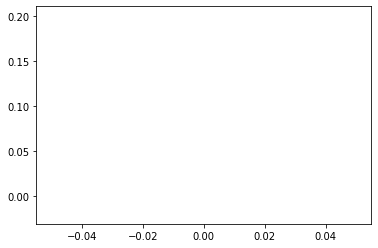

In [2]:
import socket
import numpy as np
from time import sleep

HOST_SnS = '192.168.0.103'#'128.138.224.236' 
PORT_SnS= 65490
# Create a TCP/IP socket
sock_SnS = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Connect the socket to the port where the server is listening
server_address_SnS = (HOST_SnS, PORT_SnS)
print('connecting to {} port {}'.format(*server_address_SnS))
sock_SnS.connect(server_address_SnS)


try:
     #while True:
        """Restart
        data = sock.recv(16)
            #amount_received += len(data)
        print('received {!r}'.format(data))
        """

        data = sock_SnS.recv(64)  #48 bytes
        #print(data)
        #value = struct.unpack('f',data)
        #unpacked = struct.unpack('f', data)
        print('received {!r}'.format(data))
        if data==b'start':
            
            print("starting rl policy")
            %run -i '2WayComms_and_RC-V7_ftdisplay.py'
   
            endmsg='end'
            data1=endmsg.encode('ascii')    
            sock_SnS.sendall(data1)
        #if (inputstring==b'end'):
        #   break    
        """"""
finally:       
    print('Error. closing SnS socket')
    sock_SnS.close()


In [53]:
a=[0.2, -0.1, 0.1, 0.013, 0.001, -0.007]
b=[0.2, 0.0, 0.5, 0.033, 0.006, -0.008]
c=[0.1, 0.1, 1.3, 0.013, -0.002, -0.007]
d=[0.1, 0.1, 1.2, 0.017, -0.001, -0.008]
e=[0.0, 0.1, 0.4, 0.026, -0.001, -0.00899]

LL=[]
LL.append(a)
LL.append(b)
LL.append(c)
L2=[0]*6
print("LL len",len(LL))
for i in range(len(a)): 
    #print("i:",i)
    L2[i]=0
    for j in range(len(LL)):  
        L2[i]+=LL[j][i]    
    L2[i]=L2[i]/(len(LL))


LL len 3
[0.16666666666666666, 0.0, 0.6333333333333333, 0.019666666666666666, 0.0016666666666666668, -0.007333333333333333]
